In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats
import seaborn as sns
sns.set_theme(style="white", context="paper")
from scipy.interpolate import PchipInterpolator

In [7]:
np.random.seed(42)

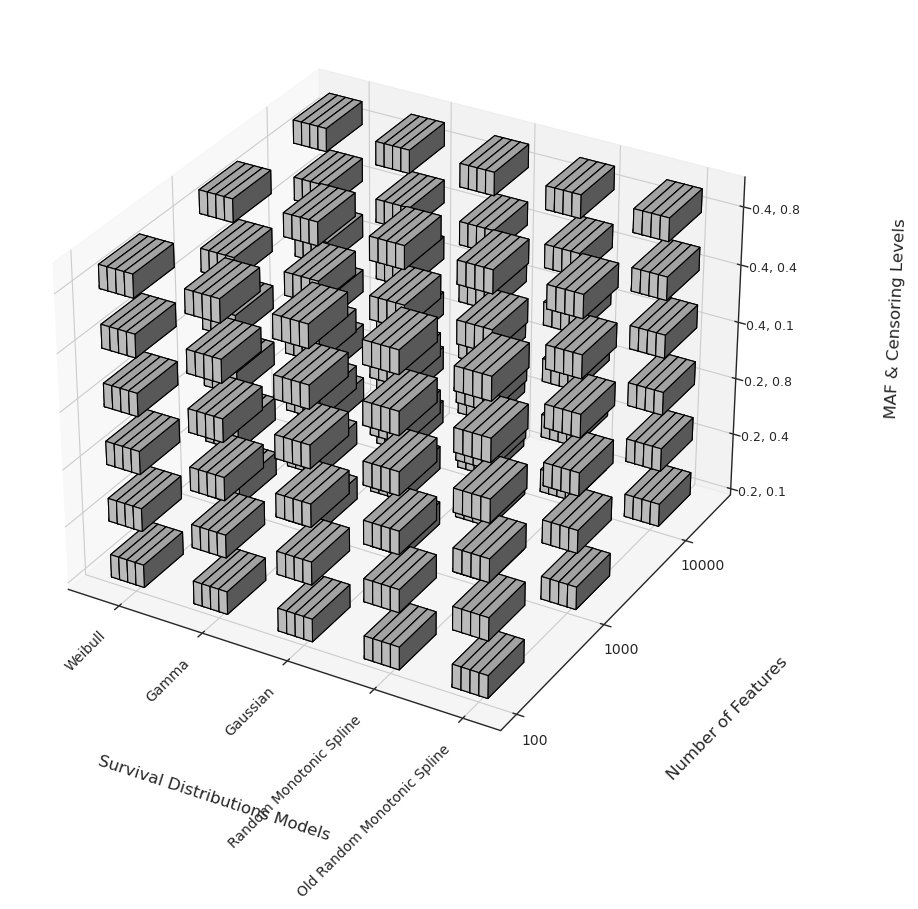

In [8]:
# Updated data with genetic models
genetic_models = ["Univariate", "Additive", "Heterogeneous", "Epistatic"]
models = ["Weibull", "Gamma", "Gaussian", "Random Monotonic Spline", "Old Random Monotonic Spline"]
num_features = ["100", "1000", "10000"]
minor_allele_frequencies = ["0.2", "0.4"]
censoring = ["0.1", "0.4", "0.8"]

# Generate grid for plotting
genetic_indices = np.arange(len(genetic_models))
model_indices = np.arange(len(models))
feature_indices = np.arange(len(num_features))
maf_indices = np.arange(len(minor_allele_frequencies))
censoring_indices = np.arange(len(censoring))

# Adjusted z-axis labels to match the number of unique combinations
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")

# Add cubes to represent each combination
for g, model in enumerate(models):
    for i, genetic_model in enumerate(genetic_models):
        for j, feature in enumerate(num_features):
            for k, maf in enumerate(minor_allele_frequencies):
                for l, cens in enumerate(censoring):
                    # Add cube for the combination
                    ax.bar3d(
                        g + i * 0.1,  # Offset for genetic and survival models
                        j,            # Number of features
                        k * len(censoring) + l,  # Combine MAF and censoring for z-axis
                        0.1, 0.4, 0.4,  # Cube dimensions
                        color="lightgray",
                        edgecolor="black",
                    )
                    for fold in range(5):
                        ax.bar3d(
                            g + i * 0.1 + 0.02 * fold,  # Slight offset for folds
                            j + 0.05 * fold,            # Slight offset for folds
                            k * len(censoring) + l + 0.03 * fold,  # Offset for folds
                            0.02, 0.05, 0.05,  # Smaller dimensions for folds
                            color="darkgray",
                            edgecolor="black",
                        )

# Update labels and ticks
ax.set_xticks(model_indices + 0.3)
ax.set_xticklabels(models, rotation=45, ha="right", fontsize=10)
ax.set_yticks(feature_indices)
ax.set_yticklabels(num_features, fontsize=10)
ax.set_zticks(np.arange(len(minor_allele_frequencies) * len(censoring)))
z_labels = [
    f"   {maf}, {cens}" for maf in minor_allele_frequencies for cens in censoring
]
ax.set_zticklabels(z_labels, fontsize=9, rotation=0)
ax.set_xlabel("Survival Distributions Models", fontsize=12, labelpad=50)
ax.set_ylabel("Number of Features", fontsize=12, labelpad=50)
ax.set_zlabel("MAF & Censoring Levels", fontsize=12, labelpad=50)

# # Title
# plt.title(
#     "Comprehensive Evaluation: Genetic Models, Survival Models, and Parameters",
#     fontsize=14,
#     pad=20,
# )
# plt.savefig('FigureModel.png')
plt.show()

/tmp/ipykernel_2352550/3376612985.py:80: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


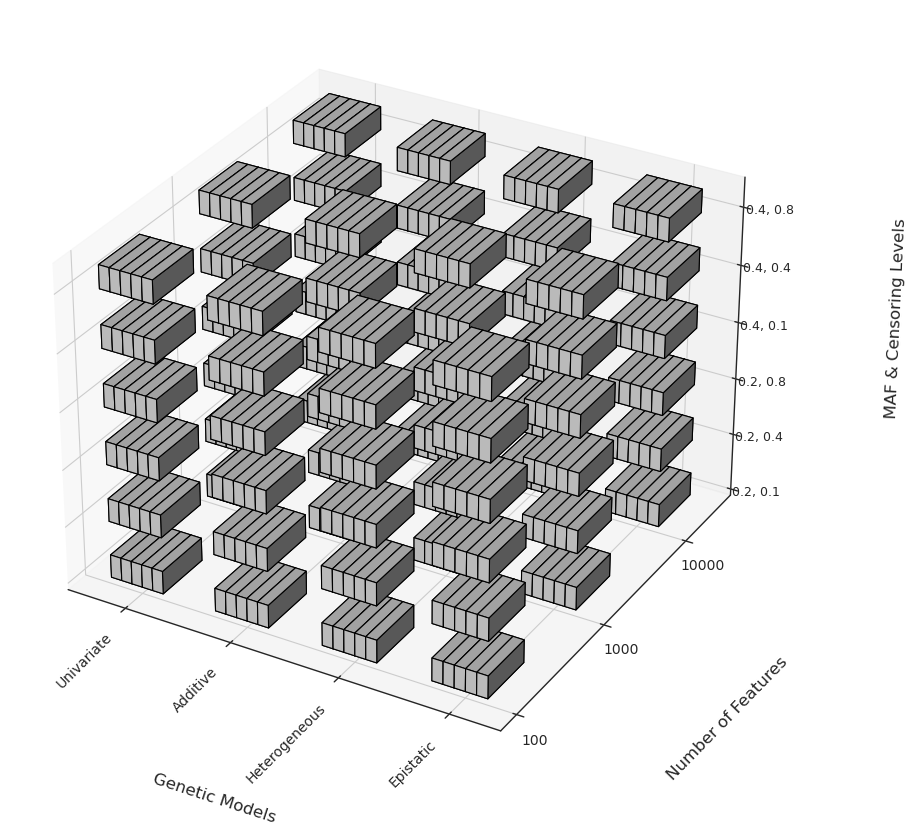

In [9]:
# Colors for the four survival distributions
distribution_colors = {
    "Weibull": "blue",
    "Gamma": "green",
    "Gaussian": "orange",
    "Random Monotonic Spline": "purple",
}
survival_distributions = list(distribution_colors.keys())

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection="3d")

# Add cubes to represent each combination with color-coded survival distributions
for g, genetic_model in enumerate(genetic_models):
    for i, model in enumerate(models):
        for j, feature in enumerate(num_features):
            for k, maf in enumerate(minor_allele_frequencies):
                for l, cens in enumerate(censoring):
                    # Add main cube for each survival distribution
                    ax.bar3d(
                        g + i * 0.1,  # Offset for genetic and survival models
                        j,            # Number of features
                        k * len(censoring) + l,  # Combine MAF and censoring for z-axis
                        0.1, 0.4, 0.4,  # Cube dimensions
                        color="lightgray",
                        edgecolor="black",
                        # alpha=0.5
                    )
                    # for dist_idx, dist in enumerate(survival_distributions):
                    #     # Offset each survival distribution slightly along the x-axis
                    #     ax.bar3d(
                    #         g + i * 0.1 + dist_idx * 0.02,  # Offset for survival distributions
                    #         j,                             # Number of features
                    #         k * len(censoring) + l,        # Combine MAF and censoring for z-axis
                    #         0.02, 0.4, 0.4,                # Cube dimensions
                    #         color=distribution_colors[dist],
                    #         # edgecolor="black",
                    #         alpha=1
                    #     )

                    # # Add smaller nested cubes for 5-fold cross-validation
                    # for fold in range(5):
                    #     ax.bar3d(
                    #         g + i * 0.1 + 0.02 * fold,          # Slight offset for folds
                    #         j + 0.05 * fold,                    # Slight offset for folds
                    #         k * len(censoring) + l + 0.03 * fold,  # Offset for folds
                    #         0.01, 0.05, 0.05,                   # Smaller dimensions for folds
                    #         color="darkgray",
                    #         edgecolor="black",
                    #         alpha=0.1
                    #     )

# Update labels and ticks
ax.set_xticks(genetic_indices + 0.3)
ax.set_xticklabels(genetic_models, rotation=45, ha="right", fontsize=10)
ax.set_yticks(feature_indices)
ax.set_yticklabels(num_features, fontsize=10)
ax.set_zticks(np.arange(len(minor_allele_frequencies) * len(censoring)))
z_labels = [
    f"{maf}, {cens}" for maf in minor_allele_frequencies for cens in censoring
]
ax.set_zticklabels(z_labels, fontsize=9, rotation=0)
ax.set_xlabel("Genetic Models", fontsize=12, labelpad=50)
ax.set_ylabel("Number of Features", fontsize=12, labelpad=50)
ax.set_zlabel("MAF & Censoring Levels", fontsize=12, labelpad=50)

# Add legend for survival distributions
# legend_patches = [
#     mpatches.Patch(color=color, label=dist) for dist, color in distribution_colors.items()
# ]
# plt.legend(handles=legend_patches, loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=10)

# Title
# plt.title(
#     "Comprehensive Evaluation: Genetic Models, Survival Distributions, and Parameters",
#     fontsize=14,
#     pad=40,
# )

plt.tight_layout()
plt.show()